# Data analysis of Retail Sales

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the supermarket sales dataset
data = pd.read_csv('retail_sales_dataset.csv')
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [44]:
# Displaying data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [46]:
def plot_product_category_pie(data):
    # Sum units sold and total amount per product category
    category_units = data.groupby('Product Category')['Quantity'].sum()
    category_sales = data.groupby('Product Category')['Total Amount'].sum()

    # Plotting Units Sold
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.pie(category_units, labels=category_units.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Units Sold by Product Category')

    # Plotting Total Amount
    plt.subplot(1, 2, 2)
    plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Total Sales Amount by Product Category')

    plt.show()

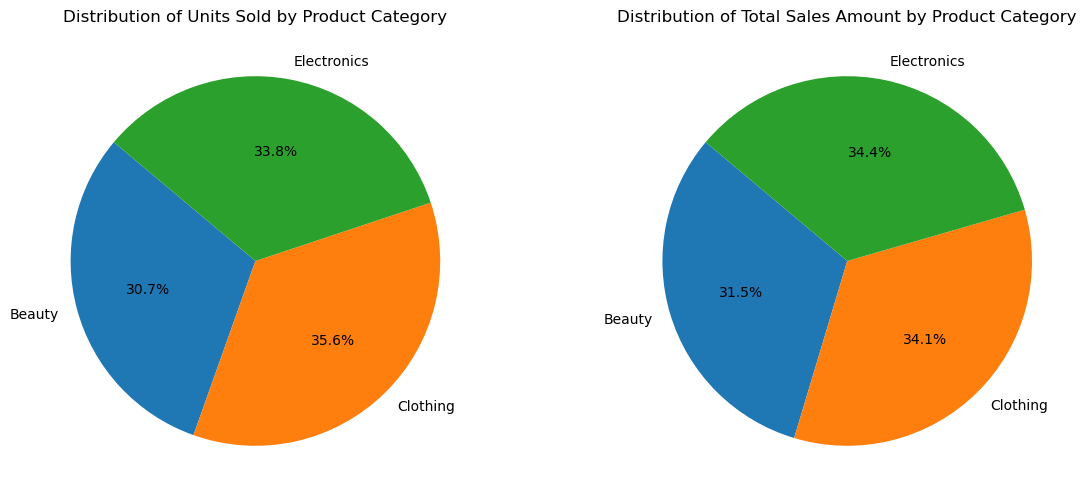

In [48]:
# Call the function with your data
plot_product_category_pie(data)

In [75]:
def plot_total_sales_scatter(data):
    # Convert Date column to datetime format
    data['Date'] = pd.to_datetime(data['Date'])

    # Aggregate total amount by date
    total_sales_per_date = data.groupby('Date')['Total Amount'].sum()

    # Scatter plotting
    plt.figure(figsize=(12, 6))
    plt.scatter(total_sales_per_date.index, total_sales_per_date, color='blue', s=100, alpha=0.7)

    # Labeling the plot
    plt.xlabel('Date')
    plt.ylabel('Total Sales Amount ($)')
    plt.title('Total Sales Amount Over Time (Scatter Plot)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

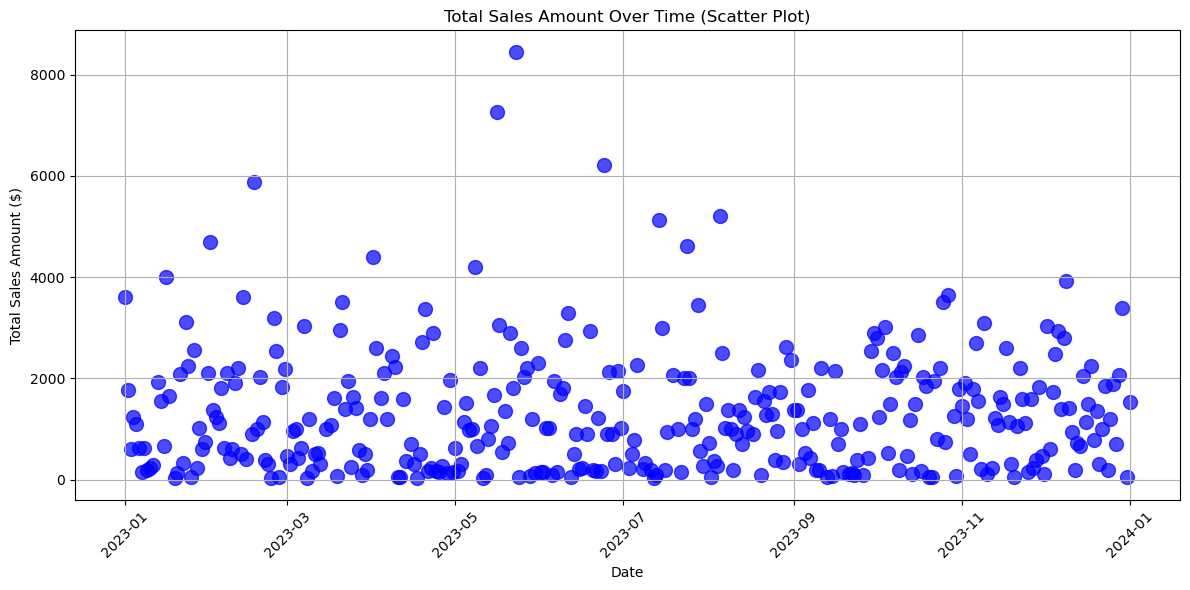

In [77]:
# Call the function with your data
plot_total_sales_scatter(data)

In [96]:
def plot_violin_plots(data):
    # Create a figure with two subplots
    plt.figure(figsize=(14, 6))

    # Violin plot for Total Amount by Product Category
    sns.violinplot(x='Product Category', y='Total Amount', data=data, hue=None, legend=False)
    plt.title('Distribution of Total Amount by Product Category')
    plt.ylabel('Total Amount ($)')
    plt.xlabel('Product Category')

    # Show the plots
    plt.show()

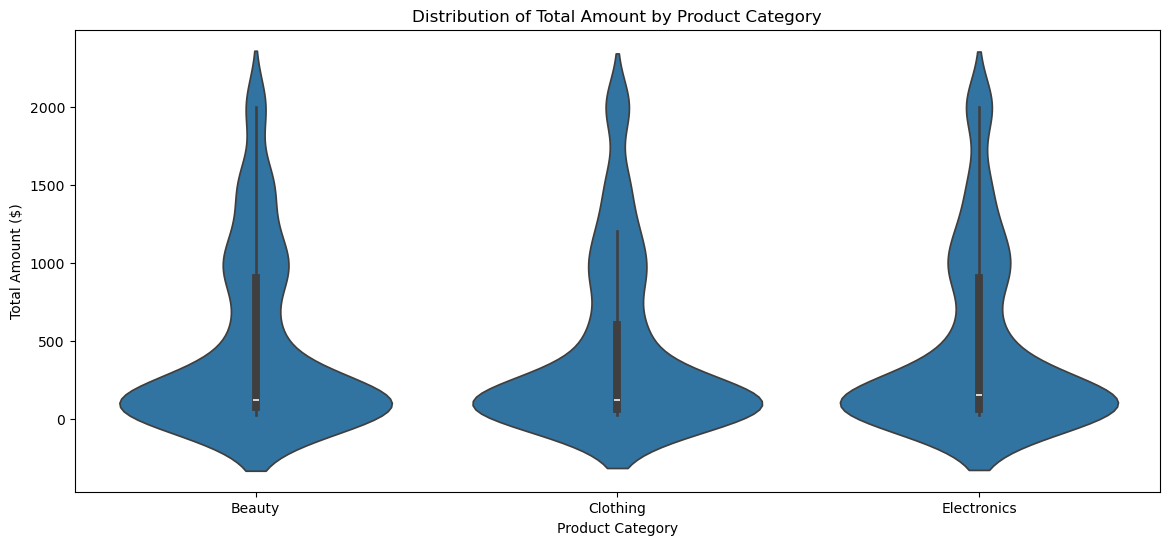

In [98]:
# Call the function with your data
plot_violin_plots(data)

In [101]:
# Addition analysis
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [106]:
numeric_df = data.select_dtypes(include=['float64', 'int64']) # Selecting Numeric Columns from data

In [112]:
# Calculating Statistical Moments
stats_moments = pd.DataFrame({
    'Mean': numeric_df.mean(),
    'Median': numeric_df.median(),
    'Standard Deviation': numeric_df.std(),
    'Skewness': numeric_df.skew(),
    'Kurtosis': numeric_df.kurt()})
stats_moments

,Mean,Median,Standard Deviation,Skewness,Kurtosis
Transaction ID,500.500,500.5,288.819436,0.000000,-1.200000
Age,41.392,42.0,13.681430,-0.048812,-1.201212
Quantity,2.514,3.0,1.132734,-0.014036,-1.392867
Price per Unit,179.890,50.0,189.681356,0.736308,-1.138996
Total Amount,456.000,135.0,559.997632,1.376128,0.815031


In [114]:
numeric_df.corr()                                           # .corr() for Calculating the Correlation of the data.

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
Transaction ID,1.000000,0.065191,-0.026623,-0.060837,-0.075034
Age,0.065191,1.000000,-0.023737,-0.038423,-0.060568
Quantity,-0.026623,-0.023737,1.000000,0.017501,0.373707
Price per Unit,-0.060837,-0.038423,0.017501,1.000000,0.851925
Total Amount,-0.075034,-0.060568,0.373707,0.851925,1.000000
